In [1]:
from apriori import get_apriori_rules
import arm_cython
import pandas as pd
import time
import pickle
import os

In [2]:
def say(message):
    os.system(f'say "{message}"')

In [3]:
min_support, min_confidence = 0.0001, 0.25

In [4]:
csv_filepath = 'data/rust_vectors_product_category_no_fuel.csv'
pickle_filepath = 'data/rust_vectors_product_category_no_fuel.pkl'

arm_cython.init(pickle_filepath, pickled=True, graph_exists=False, inflation=1.6)

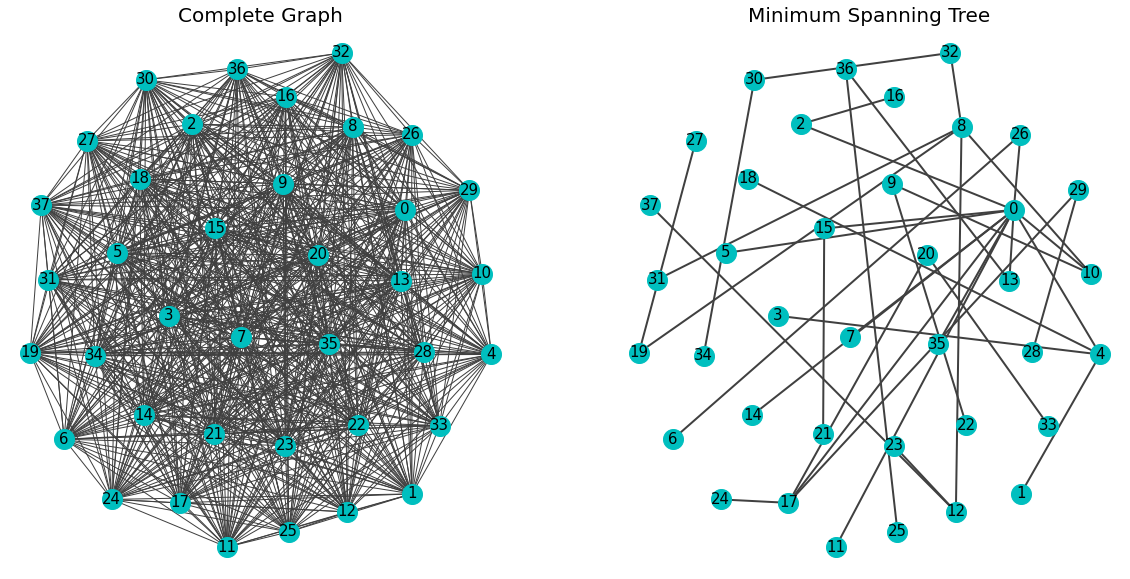

In [7]:
output_filepath='../images/graph_and_mst_no_fuel.png'
arm_cython.plot_graph_and_mst(output_filepath=output_filepath)

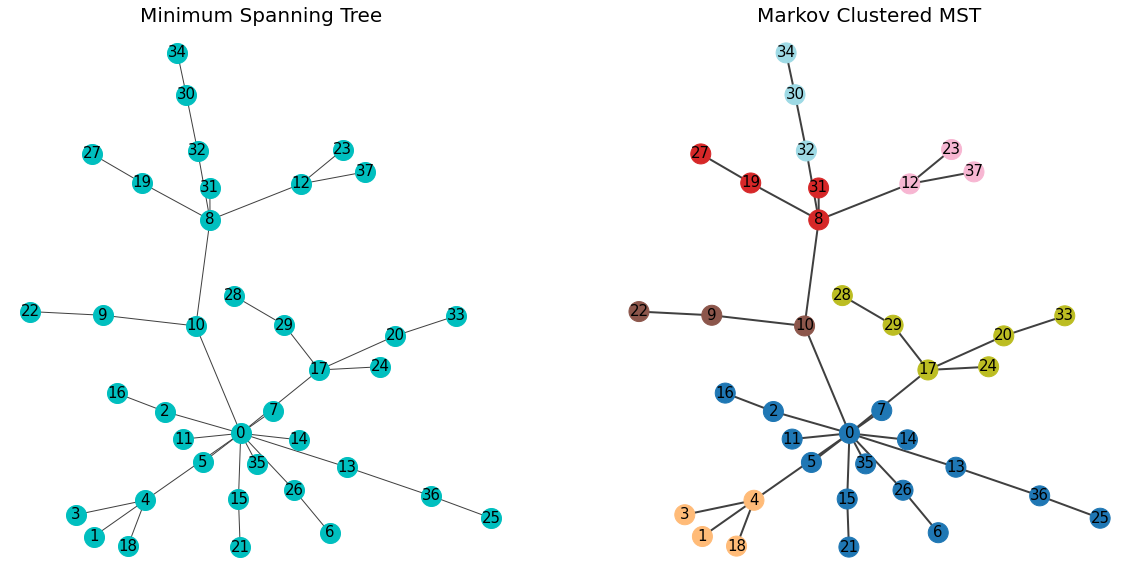

In [12]:
output_filepath='../images/mst_clustered_no_fuel2.png'
arm_cython.plot_mst_clusters(output_filepath=output_filepath)

In [5]:
clusters = arm_cython.get_clusters()

In [6]:
for c in clusters:
    print(f'{c[0]}\n{c[1]}\n---------\n')

(0, 1, 2, 3, 4, 14, 16)
('lubricant', 'several', 'filters', 'additives and fluids', 'cigarettes', 'pickets', 'canisters')
---------

(5, 13, 25, 35, 36)
('accessories', 'flavoring', 'personal hygiene', 'mate herb', 'perfumery')
---------

(6, 8, 12, 19, 23, 26, 27, 31, 37)
('popsicle and ice creams', 'chips', 'biscuits and wafer', 'energy', 'salted biscuit', 'water', 'hot alcoholic beverages', 'pastas', 'tea juice cafe in powder')
---------

(7, 11, 17, 20, 24, 28, 29, 33)
('chewing gum and candy', 'condom', 'chocolates', 'derivatives peanuts', 'cereals', 'slippers', 'toys', 'sweet coconut james')
---------

(9, 10, 22)
('the bakery', 'juices and soft drinks', 'dairy products and materials')
---------

(15, 18, 21)
('cold alcoholic beverages', 'extinguisher', 'coal')
---------

(30, 32, 34)
('covers', 'popcorn', 'batteries')
---------



In [5]:
apri_rules = get_apriori_rules(min_support=min_support, min_confidence=min_confidence)

Finished in 4.35 minutes.


In [13]:
start = time.time()
arm_rules = arm_cython.generate_bicluster_rules(min_support=min_support, min_confidence=min_confidence)
end = time.time() - start

print(f'Finished in {end/60:,.2f} minutes.')
print(f'Generated {len(arm_rules):,} rules.')

Finished in 13.27 minutes.
Generated 410 rules.


In [14]:
say("Your code has finished running.")

In [8]:
import pickle
with open('data/output/arm_rules.pkl', 'wb') as f:
    pickle.dump(arm_rules, f)

In [9]:
# with open('data/output/arm_rules.pkl', 'rb') as f:
#     # q = pickle.load(f)

# len(q)

#### Sort rules by support; highest to lowest

In [10]:

arm_rules.sort(key=lambda x: x.get_support(), reverse=True)
apri_rules.sort(key=lambda x: x.support, reverse=True)

### Top 10 MST ARM rules

In [12]:
for rule in arm_rules[:10]:
    print(f'{", ".join(rule.get_lhs()).ljust(37)} -> {", ".join(rule.get_rhs()).ljust(40)} {rule.get_support()}')

cigarettes                            -> chewing gum and candy                    0.07259339931910434
chewing gum and candy                 -> cigarettes                               0.07259339931910434
water                                 -> chewing gum and candy                    0.04731336831993142
juices and soft drinks                -> cigarettes                               0.04212188751498037
juices and soft drinks                -> chewing gum and candy                    0.04140928815653995
water                                 -> cigarettes                               0.04120159956906453
chocolates                            -> cigarettes                               0.03964136657622795
cold alcoholic beverages              -> cigarettes                               0.03382608612691607
cold alcoholic beverages              -> chewing gum and candy                    0.027982918164091597
chips                                 -> juices and soft drinks                  

### Top 10 Apriori rules

In [13]:
for rule in apri_rules[:10]:
    print(f'{", ".join(rule.lhs).ljust(37)} -> {", ".join(rule.rhs).ljust(40)} {rule.support}')

chewing gum and candy                 -> cigarettes                               0.07259339931910434
cigarettes                            -> chewing gum and candy                    0.07259339931910434
water                                 -> chewing gum and candy                    0.04731336831993142
filters                               -> lubricant                                0.04675855357741757
chocolates                            -> chewing gum and candy                    0.043458286517781594
juices and soft drinks                -> cigarettes                               0.04212188751498037
juices and soft drinks                -> chewing gum and candy                    0.04140928815653995
water                                 -> cigarettes                               0.04120159956906453
chocolates                            -> cigarettes                               0.03964136657622795
cold alcoholic beverages              -> cigarettes                              

### Top 10 mutual rules between MST ARM and Apriori

In [15]:
for a in arm_rules:
    for b in apri_rules:
        if (a.get_lhs() == b.lhs) and (a.get_rhs() == b.rhs):
            print(f'{", ".join(a.get_lhs()).ljust(37)} -> {", ".join(a.get_rhs()).ljust(40)} {a.get_support()}')

cigarettes                            -> chewing gum and candy                    0.07259339931910434
chewing gum and candy                 -> cigarettes                               0.07259339931910434
water                                 -> chewing gum and candy                    0.04731336831993142
juices and soft drinks                -> cigarettes                               0.04212188751498037
juices and soft drinks                -> chewing gum and candy                    0.04140928815653995
water                                 -> cigarettes                               0.04120159956906453
chocolates                            -> cigarettes                               0.03964136657622795
cold alcoholic beverages              -> cigarettes                               0.03382608612691607
cold alcoholic beverages              -> chewing gum and candy                    0.027982918164091597
chips                                 -> juices and soft drinks                  